# Introduction aux Probabilités et Statistiques
Dans ce notebook, nous allons explorer certains des concepts dont nous avons discuté précédemment. De nombreux concepts de probabilités et de statistiques sont bien représentés dans les principales bibliothèques de traitement de données en Python, telles que `numpy` et `pandas`.

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Variables aléatoires et distributions**

Commençons par tirer un échantillon de 30 valeurs à partir d'une distribution uniforme comprise entre 0 et 9. Nous calculerons également la moyenne et la variance.

In [ ]:
sample = [ random.randint(0, 10) for _ in range(30)]
print(f"Sample: {sample}")
print(f"Mean: {np.mean(sample)}")
print(f"Variance: {np.var(sample)}")


Sample: [6, 10, 6, 2, 2, 1, 10, 0, 2, 4, 0, 8, 9, 6, 9, 9, 7, 5, 10, 5, 5, 0, 5, 2, 7, 3, 6, 7, 1, 4]
Mean: 5.033333333333333
Variance: 9.898888888888893


Pour estimer visuellement combien de valeurs différentes il y a dans l'échantillon, nous pouvons tracer l'**histogramme** :

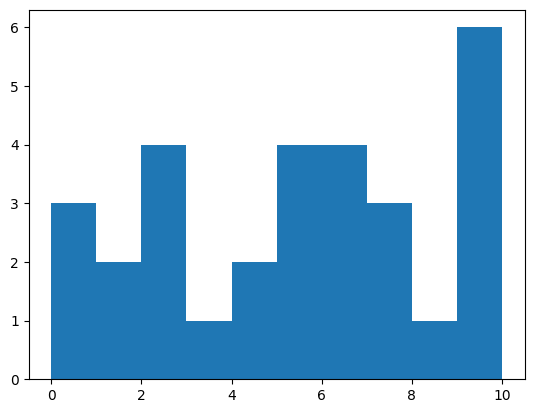

In [ ]:
plt.hist(sample)
plt.show()

**Analyse de données réelles**

La moyenne et la variance sont très importantes lors de l'analyse de données réelles. Chargeons les données relatives aux joueurs de baseball provenant de SOCR MLB Height/Weight Data.

In [ ]:
# Remplacez le chemin ci-dessous par l'emplacement exact dans votre Drive
path = "/content/drive/MyDrive/Colab Notebooks/microsoft/Science des données pour débutants/1-Introduction/04-statistiques-et-probabilités/SOCR_MLB.tsv"

df = pd.read_csv(path, sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])

df

,Name,Team,Role,Weight,Height,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


Calculons les valeurs moyennes pour l'âge, la taille et le poids :

**La Moyenne : Le centre**

C’est la valeur "centrale" ou l'équilibre de vos données. On l'obtient en additionnant toutes les valeurs et en divisant par le nombre total d'éléments.

En résumé : Si tout le monde avait la même valeur, ce serait celle-là.

Dans votre code : df['Height'].mean()

**La Variance : L'étalement**

La variance mesure à quel point les données sont éparpillées autour de la moyenne.

On calcule l'écart de chaque point par rapport à la moyenne, on met cet écart au carré (pour éviter les nombres négatifs), et on en fait la moyenne.

Si la variance est faible : Les données sont très serrées autour de la moyenne.

Si la variance est élevée : Les données sont très dispersées.

Dans votre code : df['Height'].var()

**L'Écart-type: L'écart "réel"**

C'est simplement la racine carrée de la variance.

Pourquoi l'utiliser ? La variance donne un résultat "au carré" (par exemple des $cm^2$), ce qui est dur à interpréter. L'écart-type ramène la mesure à l'unité d'origine (des $cm$).


Interprétation : Il indique de combien, en moyenne, les données s'écartent de la moyenne.Dans votre code : df['Height'].std()

In [ ]:
df[['Age', 'Height', 'Weight']].mean()

,0
Age,28.736712
Height,201.689255
Weight,73.697292


Concentrons-nous maintenant sur la taille, et calculons l'écart type et la variance :

In [ ]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()

print(f"Mean = {mean}\nVariance = {var}\nEcart type = {std}")

Mean = 201.6892545982575
Variance = 440.6426848120547
Ecart type = 20.991490771549664


En plus de la moyenne, il est utile d'examiner la valeur médiane et les quartiles. Ceux-ci peuvent être visualisés à l'aide d'un **diagramme en boîte** :

In [ ]:
print(df.shape) # Doit afficher quelque chose comme (1035, 6)
print(df['Height'].head())

(1034, 6)
0    180.0
1    215.0
2    210.0
3    210.0
4    188.0
Name: Height, dtype: float64


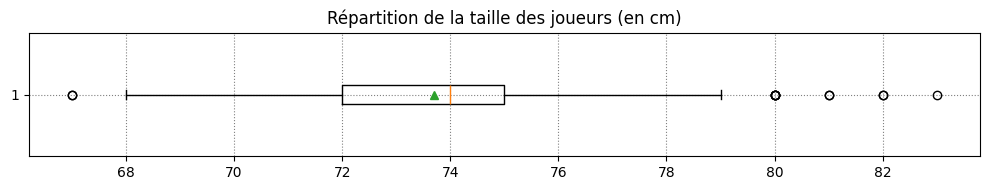

In [ ]:


# On vérifie si df n'est pas vide avant de tracer
if not df.empty:
  plt.figure(figsize=(10,2))
  # On utilise 'Height' car c'est le nom actuel de votre colonne
  plt.boxplot(df['Weight'], vert=False, showmeans=True)
  plt.title("Répartition de la taille des joueurs (en cm)")
  plt.grid(color='gray', linestyle='dotted')
  plt.tight_layout()
  plt.show()
else:
    print("Erreur : Le DataFrame est vide. Vérifiez le chargement du fichier.")

Nous pouvons également créer des boîtes à moustaches pour des sous-ensembles de notre ensemble de données, par exemple regroupés par rôle des joueurs.

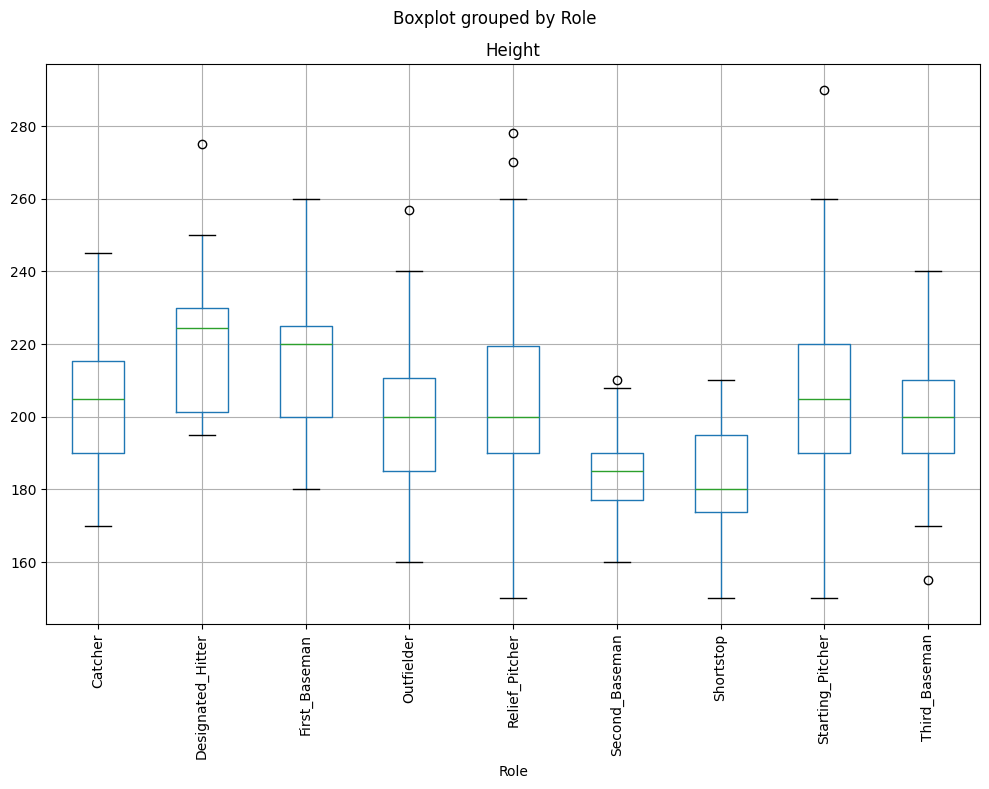

In [ ]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation = 'vertical')
plt.tight_layout()

**Remarque** :
 ce diagramme suggère qu'en moyenne, les joueurs de première base sont plus grands que ceux de deuxième base. Nous verrons plus tard comment tester cette hypothèse de manière plus formelle et comment démontrer que nos données sont statistiquement significatives pour le prouver.

Ce diagramme est une boîte à moustaches multiple (ou Grouped Boxplot). Son but est de comparer la distribution de la Taille (Height) en fonction du Poste (Role) des joueurs.

C'est l'un des outils les plus efficaces pour voir si une catégorie (par exemple, les Lanceurs "Starting Pitcher") est globalement plus grande qu'une autre (comme les Arrêts-courts "Shortstop").

Comment lire chaque boîte du graphique ?
Pour chaque poste sur le terrain, vous voyez une boîte qui résume quatre zones clés :

La ligne centrale (souvent orange) : C'est la médiane. Elle indique que 50 % des joueurs de ce poste sont plus grands que cette valeur.

Le corps de la boîte (bleu) : Il représente l'Intervalle Interquartile (IQR). Il contient les 50 % "centraux" des joueurs. Si la boîte est longue, cela signifie que les tailles sont très variées pour ce poste.

Les moustaches (traits noirs) : Elles s'étendent jusqu'aux valeurs minimales et maximales (en excluant les points extrêmes).

Les points isolés (cercles) : Ce sont les outliers (valeurs aberrantes). Ce sont des joueurs dont la taille est exceptionnellement grande ou petite par rapport à la norme de leur poste.

Ce que ce diagramme vous apprend sur vos données :
En observant le graphique généré par votre code, vous pouvez tirer plusieurs conclusions statistiques :

Comparaison des moyennes/médianes : Regardez quelle boîte est la plus "haute" sur l'axe vertical. Par exemple, au baseball, les Pitchers (lanceurs) et les First Basemen sont souvent plus grands que les Second Basemen.

Dispersion : Si une boîte est très écrasée, cela signifie que tous les joueurs à ce poste ont quasiment la même taille. Si elle est étirée, la taille n'est pas un critère fixe pour ce poste.

Chevauchement : Si deux boîtes sont au même niveau, il n'y a pas de différence significative de taille entre ces deux postes.

   _

L'âge, la taille et le poids sont tous des variables aléatoires continues. Quelle est, selon vous, leur distribution ? Un bon moyen de le découvrir consiste à tracer l'histogramme des valeurs :

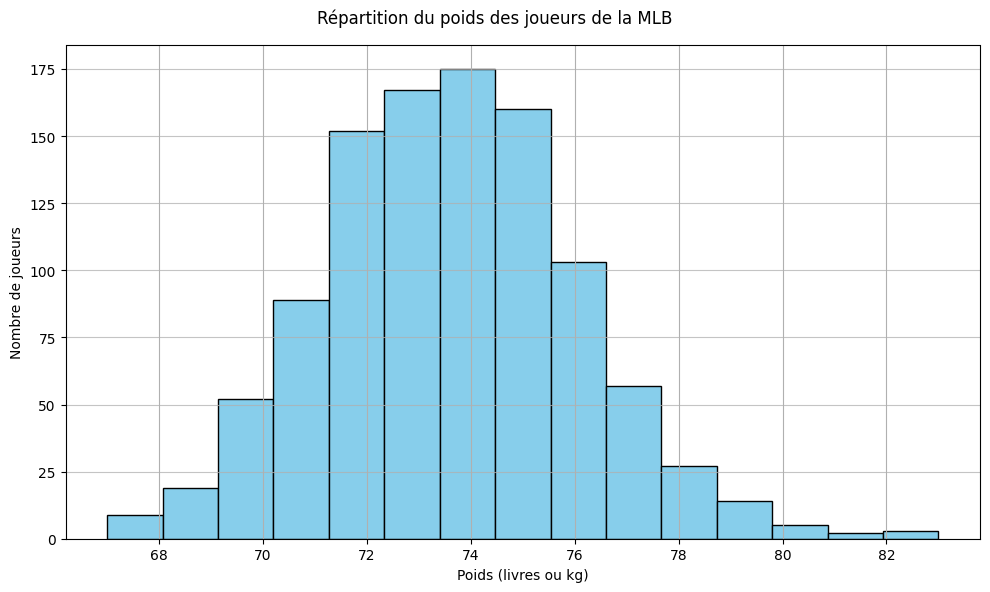

In [ ]:
df['Weight'].hist(bins=15, figsize=(10,6), color='skyblue', edgecolor='black')
plt.suptitle('Répartition du poids des joueurs de la MLB')
plt.xlabel('Poids (livres ou kg)') # Précisez l'unité si possible
plt.ylabel('Nombre de joueurs')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Voici ce que l'histogramme devrait vous révéler :

La forme en "Cloche" : Si les données sont normalement distribuées, vous verrez une bosse centrale (la moyenne) avec une diminution symétrique de chaque côté.

La symétrie :

La taille suit presque toujours une loi normale parfaite.

Le poids peut parfois présenter une légère asymétrie positive (skewness) : la queue du graphique s'étire vers la droite car il est plus fréquent d'avoir quelques joueurs très lourds que des joueurs extrêmement légers.

L'interprétation des "Bins" (colonnes) :

Le paramètre bins=15 divise votre plage de poids en 15 tranches.

La hauteur de chaque barre indique combien de joueurs tombent dans cette tranche de poids.

Distribution normale

Créons un échantillon artificiel de poids qui suit une distribution normale avec la même moyenne et la même variance que nos données réelles :

In [ ]:
generated = np.random.normal(mean, std, 1000)
generated[:10]

array([184.65656667, 189.20193553, 197.592372  , 171.78040602,
       203.42873278, 218.21501715, 212.11683222, 193.05486593,
       168.78702157, 199.52204252])

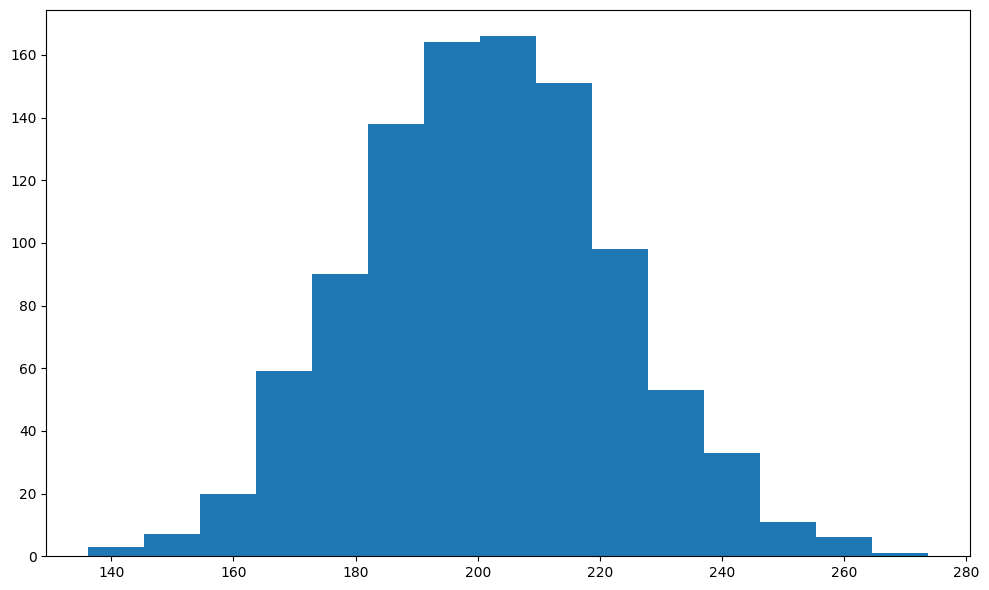

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()